In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import random
import pickle as pk
%matplotlib inline


models = ['model=(ridge_cox)_general_pp=(ohe_norm)_cf_pp=(bool)',
          'CoxKAN', 
          'DeepSurv', 
         ]

names_map = {
    'model=(ridge_cox)_general_pp=(ohe_norm)_cf_pp=(bool)': "Ridge-Cox's\nPH", 
    'CoxKAN': 'CoxKAN', 
    'DeepSurv': 'DeepSurv', 
}

names_map_2 = {
    'model=(ridge_cox)_general_pp=(ohe_norm)_cf_pp=(bool)': "Ridge-Cox's PH", 
    'CoxKAN': 'CoxKAN', 
    'DeepSurv': 'DeepSurv', 
}


/home/aolivares/miniconda3/envs/baycomp/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def calculateMeanAUC(times, aucs): 
    times_result = []
    auc_result = []
    dicts = []
    for i in range(len(times)): 
        dict_time_auc = dict()
        for j in range(len(times[i])): 
            time = times[i][j]
            times_result.append(time)
            dict_time_auc[time] = aucs[i][j]
        dicts.append(dict_time_auc)
        
    times_result = list(set(times_result))
    times_result.sort()
    
    for tr in times_result: 
        auc_values = []
        for i in range(len(times)): 
            dict_time_auc = dicts[i]
            if tr in dict_time_auc: 
                auc_values.append(dict_time_auc[tr])
            elif any([t<tr for t in times[i]]): 
                t_previo = max([t for t in times[i] if t<tr])
                auc_values.append(dict_time_auc[t_previo])
        auc_result.append(sum(auc_values)/len(auc_values))
    
    return times_result, auc_result

In [3]:
def showCindexComparison(models, only_best_features=False): 
    cindexes = []
    
    for model in models: 
        if only_best_features: 
            scores = pk.load(open(f'results/only_best_features_scores_{model}.pk', 'rb'))
        else: 
            scores = pk.load(open(f'results/scores_{model}.pk', 'rb'))
        cindexes.append(scores['cindex'])
        
    plt.figure(figsize=(4,3))
        
    xs=[]
    for i, d in enumerate(cindexes): 
        xs.append(np.random.normal(i+1, 0.08, len(d)))  
        
    alpha_points = 0.2
    for i, (x, d) in enumerate(zip(xs, cindexes)): 
        for axis, point in zip(x, d): 
            plt.scatter(axis, point, alpha=alpha_points, color='green')
    
    bp = plt.boxplot(cindexes, labels=[names_map_2[m] for m in models], showfliers=False)
    plt.setp(bp['medians'], color='black', linestyle='--')
    
    plt.ylim([0.8, 1])
    plt.xticks(rotation=30, ha='right')
    if only_best_features: 
        plt.xlabel("models (only 20 best features used)", size=14)
    else: 
        plt.xlabel("models", size=14)
    plt.ylabel("C-index", size=14)
    plt.grid(axis='y')
    plt.show()

/tmp/ipykernel_3281547/582175541.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cindexes, labels=[names_map_2[m] for m in models], showfliers=False)


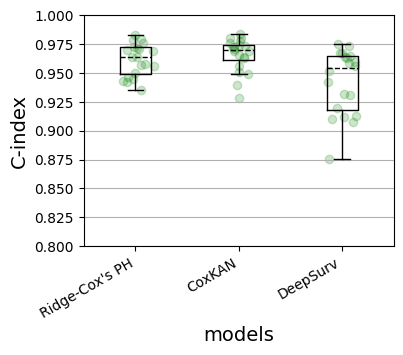

In [4]:
showCindexComparison(models)

In [5]:
def showBrierComparison(models, only_best_features=False): 
    brier_scores = []
    models_with_brier = []
    for model in models: 
        if only_best_features: 
            scores = pk.load(open(f'results/only_best_features_scores_{model}.pk', 'rb'))
        else: 
            scores = pk.load(open(f'results/scores_{model}.pk', 'rb'))
        
        if 'brier' in scores and len(scores['brier']) != 0:
            brier_scores.append(scores['brier'])
            models_with_brier.append(model)

    plt.figure(figsize=(3,3))

    xs=[]
    for i, d in enumerate(brier_scores): 
        xs.append(np.random.normal(i+1, 0.08, len(d)))  

    alpha_points = 0.2
    for i, (x, d) in enumerate(zip(xs, brier_scores)): 
        for axis, point in zip(x, d): 
            plt.scatter(axis, point, alpha=alpha_points, color='orange')

    bp = plt.boxplot(brier_scores, labels=[names_map_2[m] for m in models_with_brier], showfliers=False)
    plt.setp(bp['medians'], color='black', linestyle='--')

    plt.ylim([0, 0.3])
    plt.xticks(rotation=30, ha='right')
    if only_best_features: 
        plt.xlabel("models (only 20 best features used)", size=14)
    else: 
        plt.xlabel("models", size=14)
    plt.ylabel("Brier score", size=14)
    plt.grid(axis='y')
    plt.show()

/tmp/ipykernel_3281547/2465433135.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(brier_scores, labels=[names_map_2[m] for m in models_with_brier], showfliers=False)


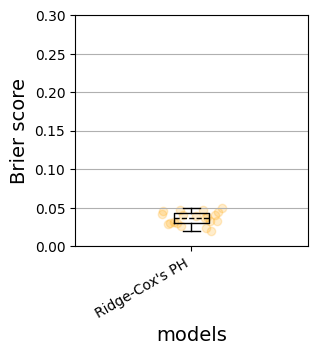

In [6]:
showBrierComparison(models)

In [7]:
def showAUC(models, only_best_features=False): 
    
    for model in models: 
        if only_best_features: 
            scores = pk.loac(open(f'results/only_best_features_scores_{model}.pk', 'rb'))
        else: 
            scores = pk.load(open(f'results/scores_{model}.pk', 'rb'))
        
        times = scores['times']
        auc = scores['auc']
        mean_auc = scores['mean_auc']

        print('\n#############################')
        print(f'MODEL: {names_map_2[model]}')
        print('#############################\n')

        plt.figure(figsize=(10, 30))
        for i in range(len(times)): 
            plt.subplot(10, 3, i+1)
            plt.plot(times[i], auc[i], marker='o')
            plt.axhline(mean_auc[i], linestyle='--')
            if i in (27, 28, 29): 
                plt.xlabel('days from enrollment')
            if i%3==0: 
                plt.ylabel('time-dependent AUC')
            plt.xlim([-80, 2500])
            plt.ylim([0.83, 1.01])
            plt.grid(True)
            plt.title(f'Partition {i+1}', y=0.0, x=0.75, fontsize=10)
        plt.show()

        times_avg, auc_avg = calculateMeanAUC(times, auc)
        mean_auc_avg = sum(auc_avg)/len(auc_avg)
        fig, ax = plt.subplots()
        plt.plot(times_avg, auc_avg, marker="o")
        plt.axhline(mean_auc_avg, linestyle="--")
        plt.xlabel("days from enrollment")
        plt.ylabel("time-dependent AUC")
        plt.xlim([-80, 2500])
        plt.ylim([0.83, 1.01])
        plt.grid(True)
        plt.title("Average")
        plt.show()



#############################
MODEL: Ridge-Cox's PH
#############################



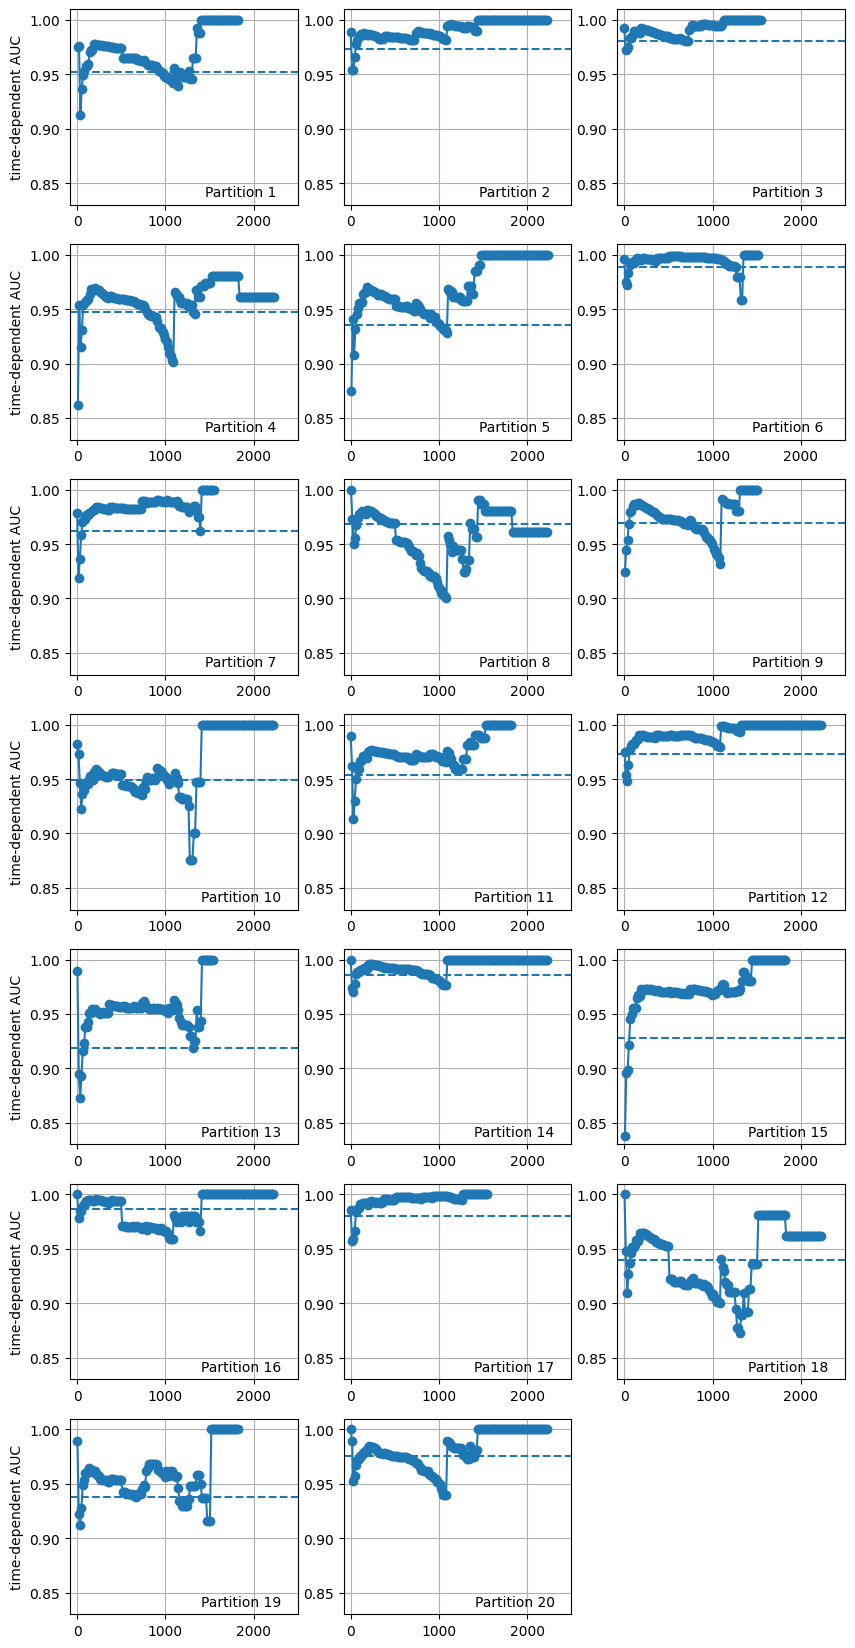

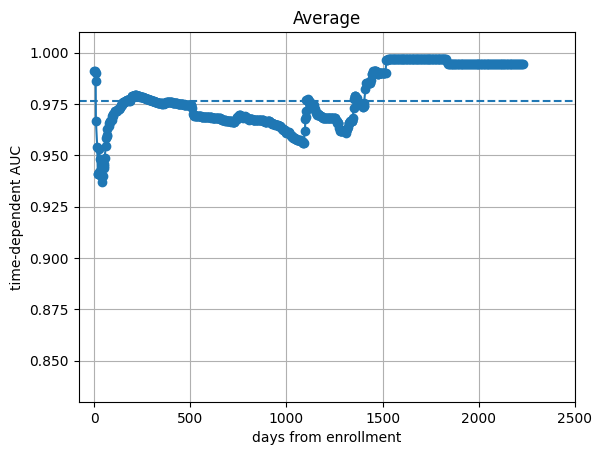


#############################
MODEL: CoxKAN
#############################



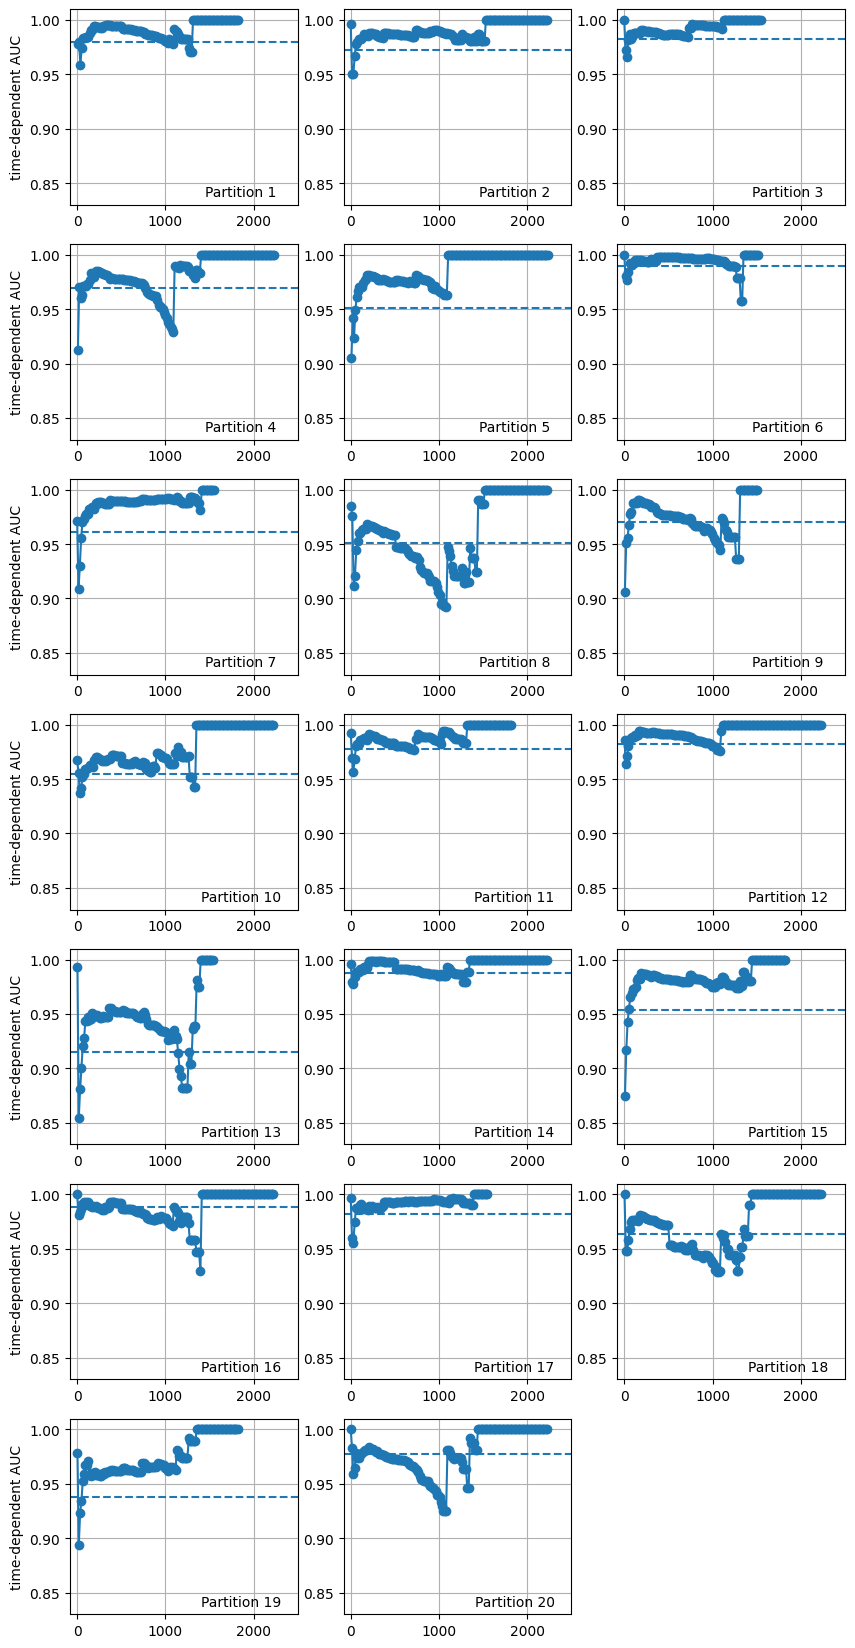

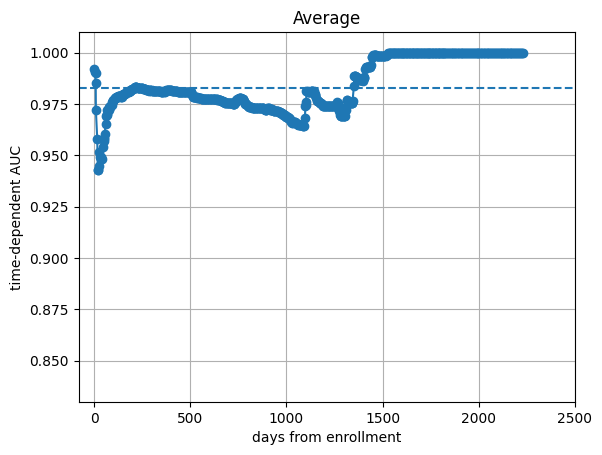


#############################
MODEL: DeepSurv
#############################



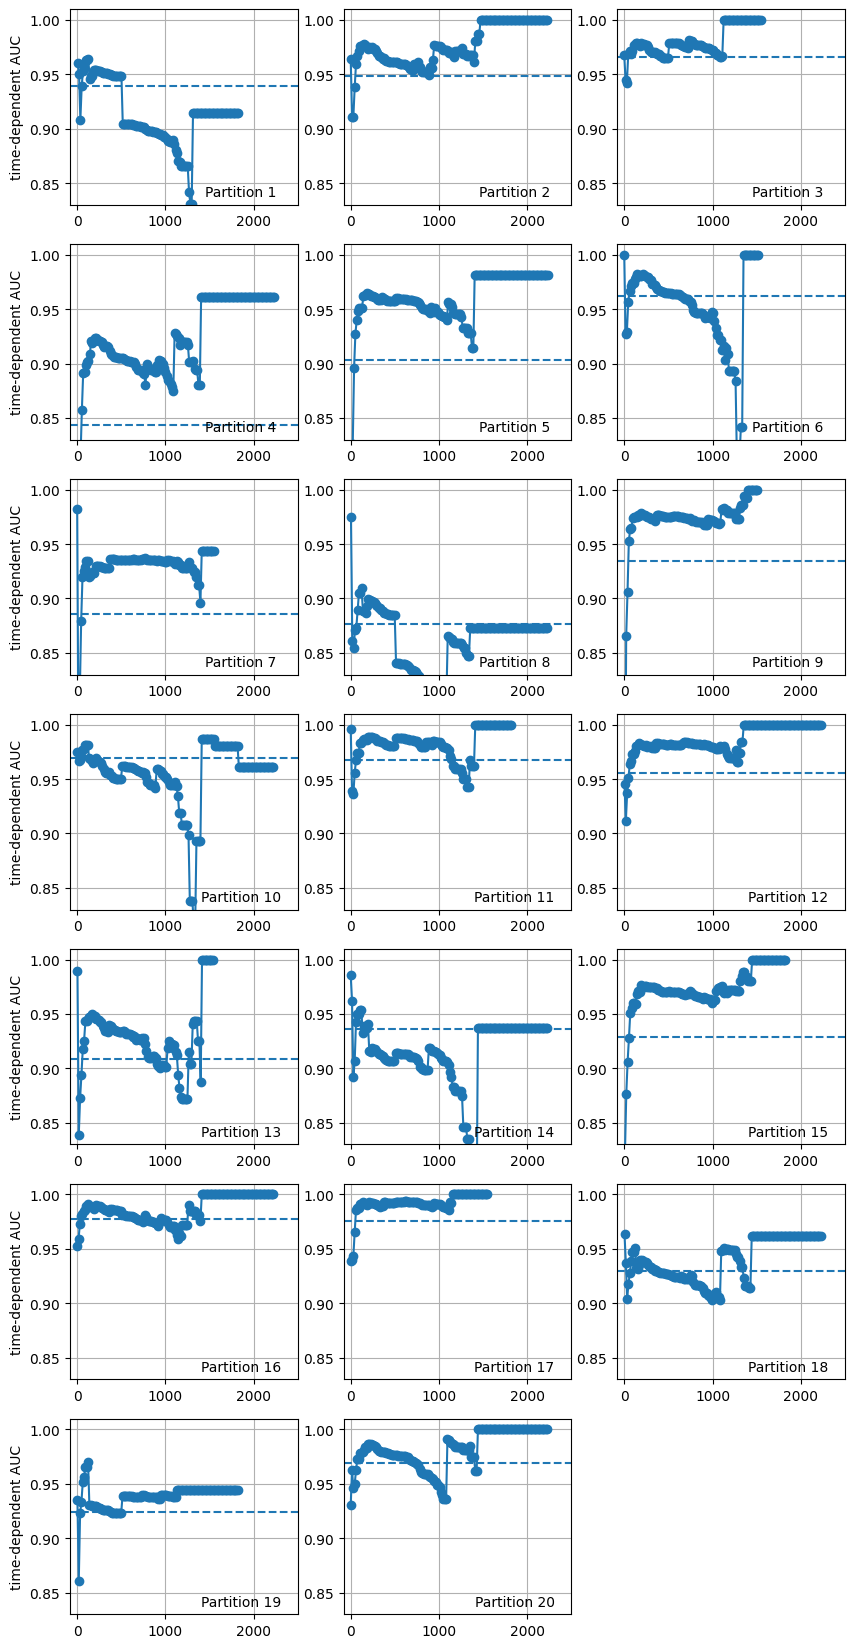

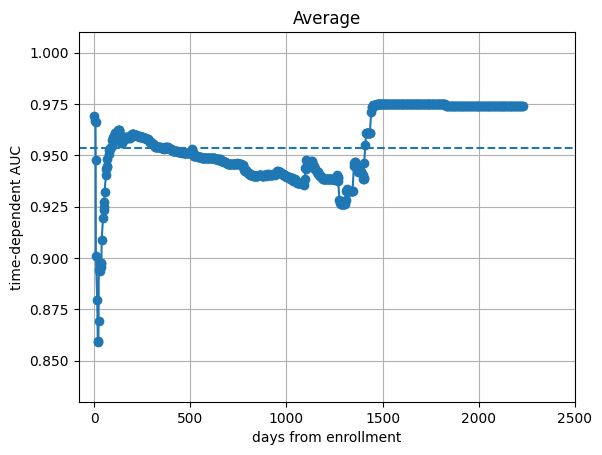

In [8]:
showAUC(models)

In [9]:
from itertools import cycle

def showAUCComparison(models, days=None, only_best_features=False): 

    n_models = len(models)
    n_subplots = n_models+1
    
    plt.figure(figsize=(15, 20))
    if days==None: 
        plt.suptitle('Comparative time-dependent AUC', y=0.92, fontsize=14)
    else: 
        plt.suptitle(f'Comparative time-dependent AUC ({days} days)', y=0.92, fontsize=14)
        
    cycol = cycle('bgrcmk')
    
    final_comparison = []
    
    for i, model in enumerate(models): 
        if only_best_features: 
            scores = pk.load(open(f'results/only_best_features_scores_{model}.pk', 'rb'))
        else: 
            scores = pk.load(open(f'results/scores_{model}.pk', 'rb'))
        
        times = scores['times']
        aucs = scores['auc']
        
        plt.subplot(int(n_subplots/2)+1, 2, i+1)
        
        new_times = []
        new_aucs = []
        new_mean_aucs = []
        for (auc, time) in zip(aucs, times): 
            if days==None: 
                new_time = time
            else: 
                new_time = [t for t in time if t<=days]
            new_auc = auc[:len(new_time)]
            new_times.append(new_time)
            new_aucs.append(new_auc)
            new_mean_aucs.append(sum(new_auc)/(len(new_auc)))
            
            plt.plot(new_time, new_auc, marker='o', color=next(cycol), alpha=0.05)
            plt.ylim([0.83, 1.01])
            
        final_comparison.append(new_mean_aucs)
            
        mean_times, mean_auc = calculateMeanAUC(new_times, new_aucs)
        mean_mean_auc = sum(mean_auc)/len(mean_auc)
        
        plt.plot(mean_times, mean_auc, marker='o', color='black')
        plt.axhline(mean_mean_auc, linestyle='--')
        
        if i in (n_subplots-3, n_subplots-2): 
            plt.xlabel('days from enrollment')
        if i%2==0: 
            plt.ylabel('time-dependent AUC')
        plt.xlim([-10, days])
        plt.grid(True)
        if only_best_features: 
            plt.title(f'{names_map_2[model]} (only 20 best features)')
        else: 
            plt.title(names_map_2[model])
        
        
    plt.figure(figsize=(3, 3))
    
    xs=[]
    for i, d in enumerate(final_comparison): 
        xs.append(np.random.normal(i+1, 0.08, len(d)))  

    alpha_points = 0.1
    for i, (x, d) in enumerate(zip(xs, final_comparison)): 
        for axis, point in zip(x, d): 
            plt.scatter(axis, point, alpha=alpha_points, color=next(cycol))
    
    
    bp = plt.boxplot(final_comparison, labels=[names_map_2[m] for m in models], showfliers=False)
    plt.setp(bp['medians'], color='black', linestyle='--')
    plt.grid(True)
    if days==None: 
        plt.title('Average time-dependent AUC comparison')
    else: 
        plt.title(f'Average time-dependent AUC comparison ({days} days)')
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('Mean time-dependent AUC')
    plt.show()
    
        

/tmp/ipykernel_3281547/4220542908.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(final_comparison, labels=[names_map_2[m] for m in models], showfliers=False)


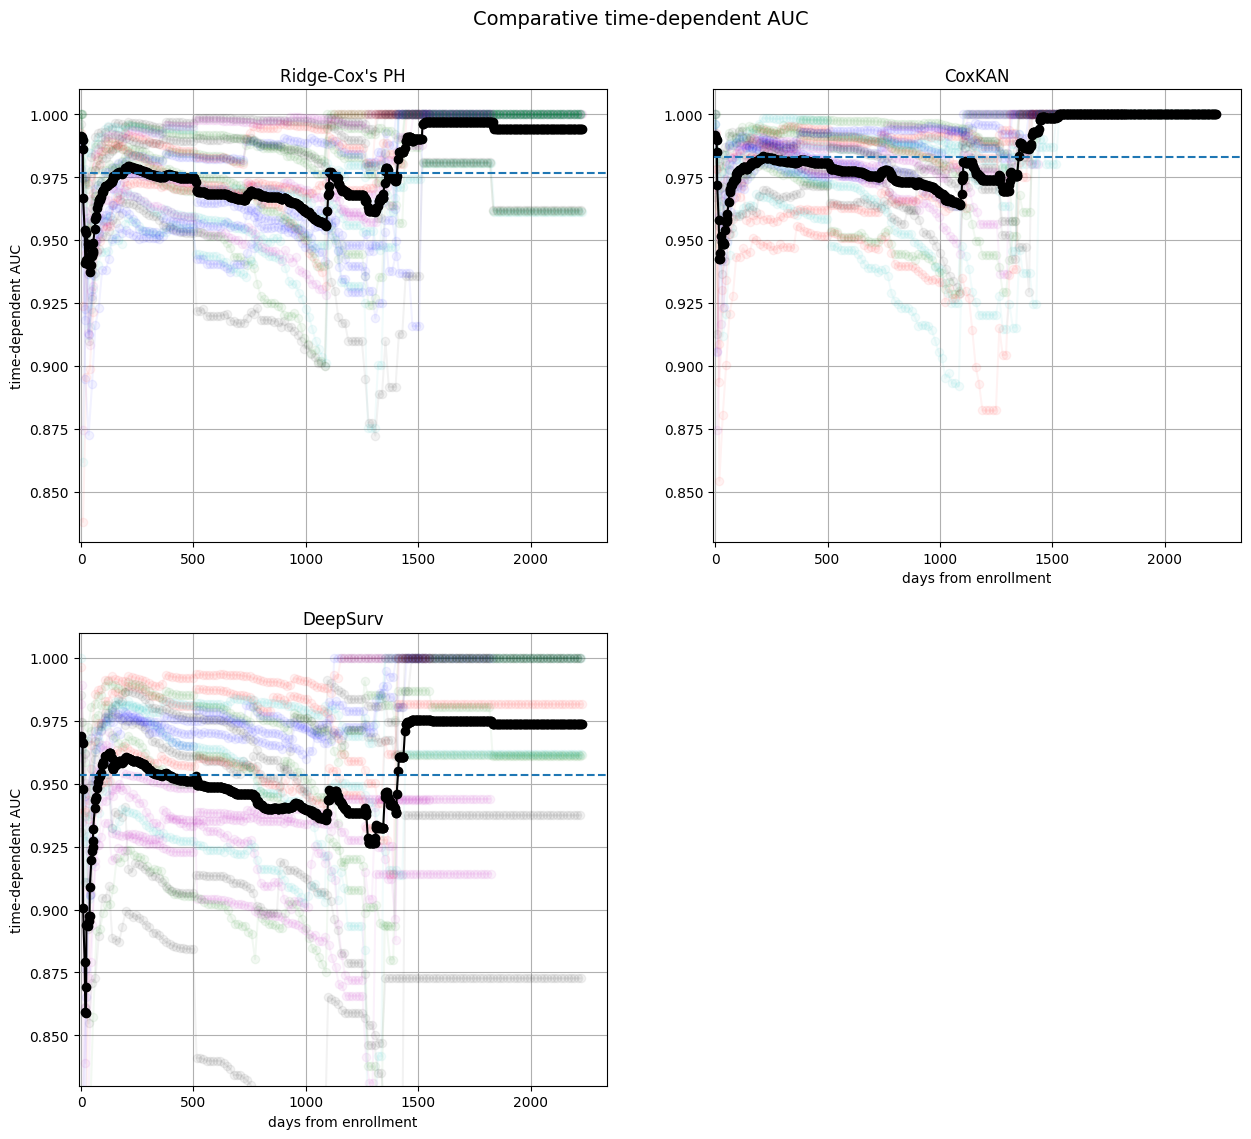

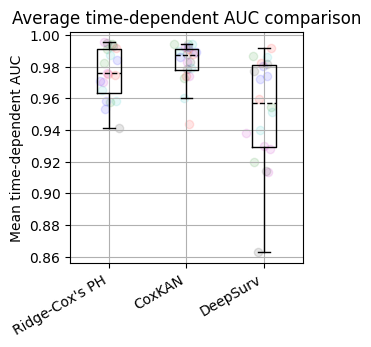

In [10]:
showAUCComparison(models)

In [11]:
from itertools import cycle

def showOverallComparison(models): 
    cindexes = []
    aucs = []

    for model in models: 
        scores = pk.load(open(f'results/scores_{model}.pk', 'rb'))
        cindexes.append(scores['cindex'])
        aucs.append(scores['mean_auc'])

    print(cindexes)

    fig = plt.figure(figsize=(8, 2.5))

    xs = []
    for i,d in enumerate(cindexes): 
        xs.append(np.random.normal(i+1, 0.09, len(d)))
    alpha_points = 0.2

    #c-index 
    plt.subplot(1,2,1)
    for i, (x, d) in enumerate(zip(xs, cindexes[::-1])): 
        for axis, point in zip(x,d): 
            plt.scatter(point, axis, alpha=alpha_points, color='salmon')

    bp = plt.boxplot(cindexes, labels=[names_map[model] for model in models], showfliers=False, vert=False, positions=[3, 2, 1])
    plt.setp(bp['medians'], color='black')

    plt.xlim([0.85, 1])
    plt.xticks(rotation=45)
    plt.ylabel("models")
    plt.xlabel('C-index')
    plt.grid(axis='x')

    #MEAN AUC
    plt.subplot(1,2,2)
    cycol = cycle('bgrcmk')
    for i, (x, d) in enumerate(zip(xs, aucs[::-1])): 
        for axis, point in zip(x,d): 
            plt.scatter(point, axis, alpha=alpha_points, color=next(cycol))

    bp = plt.boxplot(aucs, labels=[""]*len(models), showfliers=False, vert=False, positions=[3, 2, 1])
    plt.setp(bp['medians'], color='black')
    plt.xlim([0.85, 1])
    plt.xticks(rotation=45)
    plt.xlabel('Mean time-dependent AUC')
    plt.grid(axis='x')

    fig.savefig(f'figs/comparison_2.pdf', bbox_inches='tight', format='pdf')

    #AUC
    fig = plt.figure(figsize=(9,9))
    cycol = cycle('bgrcmk')
    
    n_models = len(models)
    n_subplots = n_models+1

    for i, model in enumerate(models): 
        plt.subplot(int(n_subplots/2)+1, 2, i+1)
        scores = pk.load(open(f'results/scores_{model}.pk', 'rb'))
        
        times = scores['times']
        aucs = scores['auc']

        for (auc, time) in zip(aucs, times): 
            plt.plot(time, auc, marker='.', color=next(cycol), alpha=0.05)
            plt.ylim([0.83, 1.01])

        mean_times, mean_auc = calculateMeanAUC(times, aucs)
        mean_mean_auc = sum(mean_auc)/len(mean_auc)

        plt.plot(mean_times, mean_auc, marker='.', color='black')
        plt.axhline(mean_mean_auc, linestyle='--')
        plt.title(names_map_2[model])
        if i%2==0: 
            plt.ylabel('time-dependent AUC')
        if i>1: 
            plt.xlabel('days')
        plt.grid()
        
    fig.tight_layout()
    fig.savefig(f'figs/auc_2.pdf', bbox_inches='tight', format='pdf')

[[0.9565903709550119, 0.9719046063377981, 0.9727997498827575, 0.9556398416886543, 0.9461827284105131, 0.9825313117996045, 0.9641178314008148, 0.9638395792241946, 0.9690031152647975, 0.9419450876612636, 0.9580031695721077, 0.9710522036103432, 0.9353932584269663, 0.9791528788881535, 0.9495089011663598, 0.9788377561303325, 0.9758789216459088, 0.942838477870325, 0.94477286869944, 0.9702085402184707], [0.930939226519337, 0.9563868016987912, 0.9626387369079256, 0.9070745382585752, 0.9419586983729662, 0.9650626235992089, 0.9120181761203384, 0.8754109138724523, 0.9598130841121495, 0.9584849487264308, 0.9670364500792393, 0.9640591966173362, 0.9313358302122348, 0.9123097286565188, 0.9518109269490485, 0.9732952636882768, 0.9747753428976825, 0.919973869018455, 0.9100808960796515, 0.9675604104601125], [0.9758484609313338, 0.9722312969617772, 0.9740503360950445, 0.9658641160949868, 0.956351689612015, 0.9833553065260382, 0.9686618614854278, 0.9487179487179487, 0.9688473520249221, 0.9508766126364538, 

/tmp/ipykernel_3281547/940455654.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cindexes, labels=[names_map[model] for model in models], showfliers=False, vert=False, positions=[3, 2, 1])
/tmp/ipykernel_3281547/940455654.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(aucs, labels=[""]*len(models), showfliers=False, vert=False, positions=[3, 2, 1])


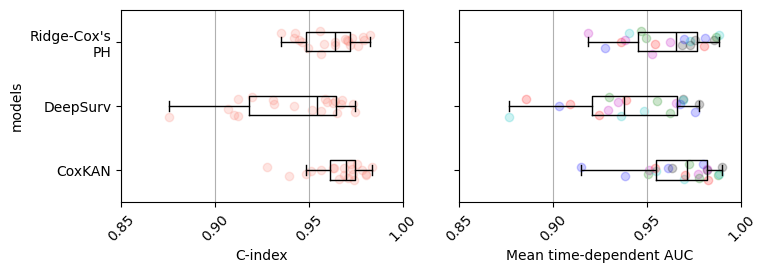

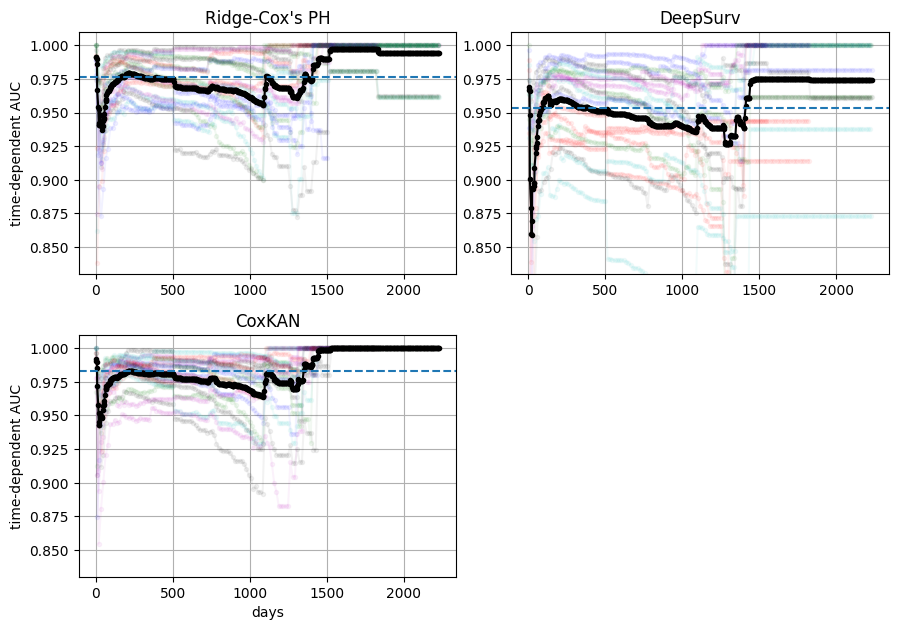

In [12]:
models = ['model=(ridge_cox)_general_pp=(ohe_norm)_cf_pp=(bool)',
          'DeepSurv', 
          'CoxKAN', 
         ]
showOverallComparison(models)

In [13]:
import pickle as pk

tuned_params = pk.load(open('results/tuned_params_CoxKAN.pk', 'rb'))

num_hidden = []
hidden_dim = []
base_fun = []
grid = []
noise_scale = []
lr = []
steps = []
lamb = []
lamb_entropy = []
lamb_coef = []

for tp in tuned_params: 
    num_hidden.append(tp['num_hidden'])
    hidden_dim.append(tp['hidden_dim'])
    base_fun.append(tp['base_fun'])
    grid.append(tp['grid'])
    noise_scale.append(tp['noise_scale'])
    lr.append(tp['lr'])
    steps.append(tp['steps'])
    lamb.append(tp['lamb'])
    lamb_entropy.append(tp['lamb_entropy'])
    lamb_coef.append(tp['lamb_coef'])
    
print('num_hidden')
print(max(set(num_hidden), key=num_hidden.count))
print('hidden_dim')
print(max(set(hidden_dim), key=hidden_dim.count))
print('base_fun')
print(max(set(base_fun), key=base_fun.count))
print('grid')
print(max(set(grid), key=grid.count))
print('noise_scale')
print(sum(noise_scale)/len(noise_scale))
print('lr')
print(sum(lr)/len(lr))
print('steps')
print(sum(steps)/len(steps))
print(max(set(steps), key=steps.count))
print('lamb')
print(sum(lamb)/len(lamb))
print('lamb_entropy')
print(sum(lamb_entropy)/len(lamb_entropy))
print('lamb_coef')
print(sum(lamb_coef)/len(lamb_coef))

num_hidden
0
hidden_dim
4
base_fun
silu
grid
4
noise_scale
0.07945047505765535
lr
0.014270017335385216
steps
105.1
98
lamb
0.010444540642485643
lamb_entropy
11.55
lamb_coef
2.85


In [15]:
tuned_params = pk.load(open('results/tuned_params_DeepSurv.pk', 'rb'))

num_hidden = []
activation = []
num_units = []
optimizer = []
lr = []
num_epochs = []
l2_reg = []
dropout = []

for tp in tuned_params: 
    num_hidden.append(tp['num_hidden'])
    activation.append(tp['activation0'])
    num_units.append(tp['num_units0'])
    optimizer.append(tp['optimizer'])
    lr.append(tp['lr'])
    num_epochs.append(tp['num_epochs'])
    l2_reg.append(tp['l2_reg'])
    dropout.append(tp['dropout'])
    
print('num_hidden')
print(max(set(num_hidden), key=num_hidden.count))
print('activation')
print(max(set(activation), key=activation.count))
print('num_units')
print(sum(num_units)/len(num_units))
print('optimizer')
print(max(set(optimizer), key=optimizer.count))
print('lr')
print(sum(lr)/len(lr))
print('num_epochs')
print(sum(num_epochs)/len(num_epochs))
print('l2_reg')
print(sum(l2_reg)/len(l2_reg))
print('dropout')
print(max(set(dropout), key=dropout.count))

num_hidden
2
activation
LogLog
num_units
138.4
optimizer
sgd
lr
0.005909373135053587
num_epochs
654.5
l2_reg
0.007262146746014349
dropout
0.5660160307265197
